**Question 27.1 (d):**

In [2]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt

**Recreating the images:**

In [3]:
  # the functino being approximated:
def realFun(x, r) :
    return np.exp(-x)* x **(r - 1) / factorial(r)

  # approximating gaussian from (a)
def approxFunA(x, r) :
    return np.exp(1 - r) * ((r - 1) ** (r - 1)) / factorial(r) * \
                        np.exp(-(x - r + 1) ** 2 / (2 * (r - 1)))

  # approximating gaussian from (c)
def approxFunC(x, r) :
    return np.exp(-r) * r ** r / factorial(r) * \
                        np.exp(-r * (x - np.log(r)) ** 2 / (2))

  # for normalising:
def numInt(res, ys):
    return (np.sum(ys) - (ys[0] + ys[ys.size - 1]) / 2 ) / res

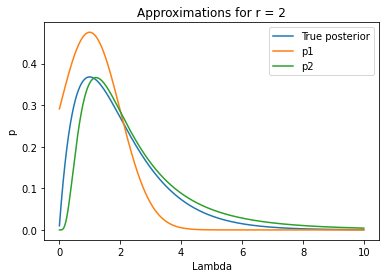

In [13]:
res = 100

x = np.array([idx * 1 / res for idx in range(1, res * 10)])
twos = np.array([2 for idx in range(x.size)])

yR = realFun(x, twos)
yR = realFun(x, twos) / numInt(res, yR)

yA = approxFunA(x, twos)
yA = approxFunA(x, twos) / numInt(res, yA)

  # transforming the gaussian back from y to lambda (and plotting):
yC = np.multiply(approxFunC(np.log(x), twos), 1/x)
yC = yC / numInt(res, yC)

plt.plot(x, yR, label = "True posterior")
plt.plot(x, yA, label = "p1")
plt.plot(x, yC, label = "p2")
plt.xlabel("Lambda")
plt.ylabel("p")
plt.title("Approximations for r = 2")
plt.legend()
plt.show()

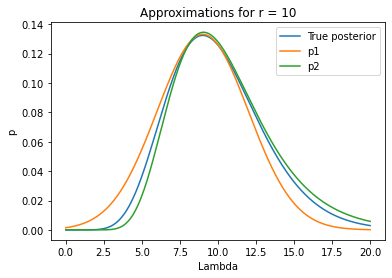

In [12]:
res = 100
x = np.array([idx * 1 / res for idx in range(1, res * 20)])
tens = np.array([10 for idx in range(x.size)])

yR = realFun(x, tens)
yR = realFun(x, tens) / numInt(res, yR)

yA = approxFunA(x, tens)
yA = approxFunA(x, tens) / numInt(res, yA)

yC = np.multiply(approxFunC(np.log(x), tens), 1/x)
yC = yC / numInt(res, yC)

plt.plot(x, yR, label = "True posterior")
plt.plot(x, yA, label = "p1")
plt.plot(x, yC, label = "p2")
plt.legend(loc='upper right')
plt.xlabel("Lambda")
plt.ylabel("p")
plt.title("Approximations for r = 10")
plt.show()